In [1]:
from refnx.dataset import Data1D
from refnx.dataset import ReflectDataset
import refnx
import data_in
data = data_in.data_in('d2o/29553_54.dat')
print(data)
# dataset = data # ...
data = Data1D(data) 
print(data)

csv
cvs-collecting
[[1.23000e-02 1.29150e-02 1.35608e-02 1.42388e-02 1.49507e-02 1.56983e-02
  1.64832e-02 1.73073e-02 1.81727e-02 1.90813e-02 2.00354e-02 2.10372e-02
  2.20890e-02 2.31935e-02 2.43532e-02 2.55708e-02 2.68494e-02 2.81918e-02
  2.96014e-02 3.10815e-02 3.26356e-02 3.42673e-02 3.59807e-02 3.77797e-02
  3.96687e-02 4.16522e-02 4.37348e-02 4.59215e-02 4.82176e-02 5.06285e-02
  5.31599e-02 5.58179e-02 5.86088e-02 6.15392e-02 6.46162e-02 6.78470e-02
  7.12393e-02 7.48013e-02 7.85414e-02 8.24684e-02 8.65919e-02 9.09215e-02
  9.54675e-02 1.00241e-01 1.05253e-01 1.10516e-01 1.16041e-01 1.21843e-01
  1.27936e-01 1.34332e-01 1.41049e-01 1.48102e-01 1.55506e-01 1.63282e-01
  1.71446e-01 1.80018e-01 1.89019e-01 1.98470e-01 2.08394e-01 2.18813e-01
  2.29754e-01 2.41242e-01 2.53304e-01 2.65969e-01 2.79267e-01 2.93231e-01
  3.07892e-01 3.22701e-01]
 [7.00464e-01 6.93040e-01 6.98883e-01 6.88379e-01 6.88869e-01 6.83959e-01
  6.83939e-01 6.53598e-01 4.32526e-01 1.90229e-01 1.04531e-01 6.59

In [2]:
from refnx.reflect import SLD, Erf
# simple setup, no tilt, equation or checking
air = SLD(value=0+0j, name='air')
polymer = SLD(4.1,'polymer')
#air-polymer roughness of 17.5, polymer size of 40.5
polymer = polymer(40.5, 17.5)
polymer.thick.setp(vary=True,bounds=(26,55))
polymer.rough.setp(vary=True,bounds=(11,24))
polymer.sld.real.setp(vary=True,bounds=(1.92,6.21))
polymer.vfsolv.setp(vary=True, bounds=(0,1))
water = SLD(3.5,'water')
water = water(0,13)
polymer.rough.setp(vary=True,bounds=(0,26))
water.sld.real.setp(vary=True,bounds=(-0.56,6.35))
structure = air | polymer | water
 #air-polymer roughness of 4, polymer size of 55
 #Erf()  <-error function
structure[1].interfaces = Erf() # air-polymer interface
structure[2].interfaces = Erf()
print(structure)

________________________________________________________________________________
Structure:                
solvent: None
reverse structure: False
contract: 0

________________________________________________________________________________
Parameters:      'air'     
<Parameter: 'air - thick' , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:  'air - sld'  , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter: 'air - isld'  , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter: 'air - rough' , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air - volfrac solvent', value=0 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters:    'polymer'   
<Parameter:'polymer - thick', value=40.5          , bounds=[26, 55]>
<Parameter:'polymer - sld', value=4.1          , bounds=[1.92, 6.21]>
<Parameter:'polymer - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'polymer - rough', value=17.5          , bounds=[0, 26]>
<Par

In [3]:
from refnx.reflect import ReflectModel
model = ReflectModel(structure, bkg=0, dq=0)
model.scale.setp(vary=True, bounds=(-1, 1.5))
model.bkg.setp(vary=True,bounds=(-1, 1.5))
#print(model)

In [4]:
from refnx.analysis import CurveFitter, Objective
objective = Objective(model, data)
fitter = CurveFitter(objective)
fitter.fit('differential_evolution')
print(objective,'\n')
#print(fitter)

________________________________________________________________________________
Objective - 1472096972928
Dataset = <None>, 68 points
datapoints = 68
chi2 = 2169.465556518847
Weighted = True
Transform = None
________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=0.700485 +/- 0.00112, bounds=[-1, 1.5]>
<Parameter:     'bkg'     , value=3.94499e-06 +/- 1.97e-07, bounds=[-1, 1.5]>
<Parameter:'dq - resolution', value=0 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:      'air'     
<Parameter: 'air - thick' , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:  'air - sld'  , value=0 (fixed)  , bounds=[-inf

<IPython.core.display.Javascript object>


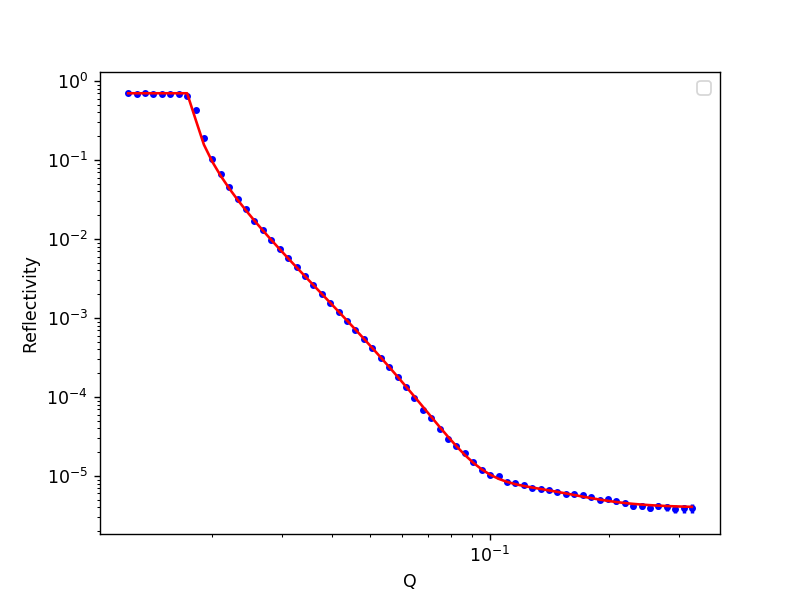

No handles with labels found to put in legend.


In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
objective.plot()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Q')
plt.ylabel('Reflectivity')
plt.legend();